In [1]:
import pandas as pd
import numpy as np

In [8]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
single_image=x_train[0]

In [13]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
single_image.shape

(28, 28)

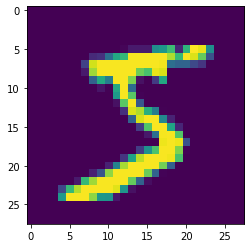

In [60]:
plt.imshow(single_image)

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_train.shape

(60000,)

In [26]:
y_example=to_categorical(y_train)

In [27]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [28]:
y_example.shape

(60000, 10)

In [29]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
y_cat_test=to_categorical(y_test,10)

In [31]:
y_cat_train=to_categorical(y_train,10)

In [32]:
single_image.max()

255

In [33]:
single_image.min()

0

In [34]:
x_train=x_train/255

In [35]:
x_test=x_test/255

In [36]:
scaled_single=x_train[0]

In [37]:
scaled_single.max()

1.0

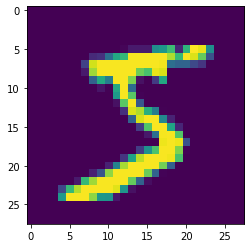

In [59]:
plt.imshow(scaled_single)

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
x_test.shape

(10000, 28, 28)

In [41]:
x_train=x_train.reshape(60000,28,28,1)

In [42]:
x_train.shape

(60000, 28, 28, 1)

In [43]:
x_test=x_test.reshape(10000,28,28,1)

In [44]:
x_test.shape

(10000, 28, 28, 1)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [48]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [52]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1386 - accuracy: 0.9585 - val_loss: 0.0482 - val_accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0584 - val_accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0415 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0420 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0398 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0558 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0447 -

In [53]:
model.metrics_names

['loss', 'accuracy']

In [54]:
losses=pd.DataFrame(model.history.history)

In [55]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.138610,0.958483,0.048191,0.9853
1,0.047399,0.985517,0.058354,0.9807
2,0.029486,0.990633,0.041504,0.9862
3,0.020751,0.993333,0.041983,0.9854
4,0.013804,0.995583,0.039842,0.9870


<AxesSubplot:>

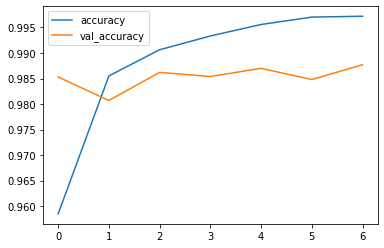

In [58]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

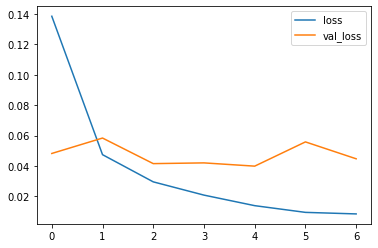

In [69]:
losses[['loss','val_loss']].plot()

In [61]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04468335211277008, 0.9876999855041504]


In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
predictions=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [64]:
y_cat_test.shape

(10000, 10)

In [65]:
y_cat_test.shape

(10000, 10)

In [66]:
predictions[0]

7

In [67]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [70]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    1,    1,    0,    1,    2,    0,    1,    0],
       [   1, 1125,    3,    1,    0,    2,    1,    1,    1,    0],
       [   1,    1, 1016,    0,    2,    0,    2,   10,    0,    0],
       [   0,    0,    2, 1004,    0,    2,    0,    0,    2,    0],
       [   0,    1,    1,    0,  969,    0,    5,    0,    0,    6],
       [   2,    0,    1,    7,    0,  881,    1,    0,    0,    0],
       [   6,    2,    0,    0,    1,    3,  944,    0,    2,    0],
       [   0,    0,    4,    1,    0,    0,    0, 1020,    1,    2],
       [   4,    1,    4,    1,    0,    5,    1,    3,  953,    2],
       [   0,    1,    0,    0,    9,    2,    0,    4,    2,  991]],
      dtype=int64)

In [71]:
import seaborn as sns

<AxesSubplot:>

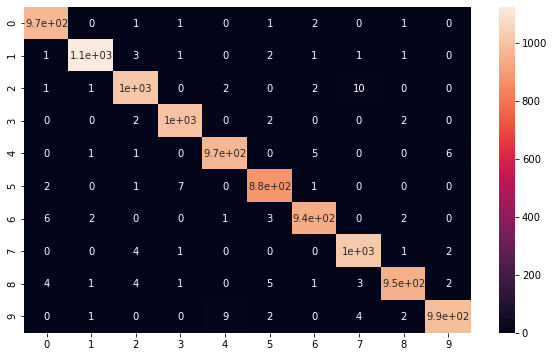

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [73]:
my_number=x_test[0]

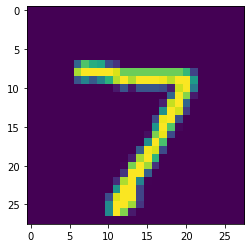

In [74]:
plt.imshow(my_number.reshape(28,28))

In [75]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)

#2

In [77]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 129s 1us/step


In [78]:
x_train.shape

(50000, 32, 32, 3)

In [80]:
x_train[0].shape

(32, 32, 3)

In [81]:
import matplotlib.pyplot as plt

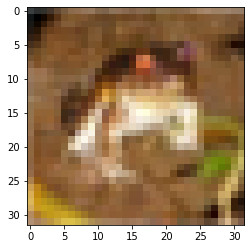

In [82]:
plt.imshow(x_train[0])

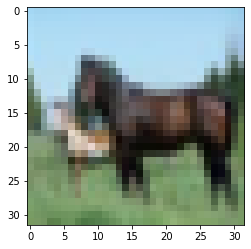

In [83]:
plt.imshow(x_train[12])

In [84]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [85]:
x_train[0].shape

(32, 32, 3)

In [86]:
x_train.max()

255

In [87]:
x_train=x_train/255

In [88]:
x_test=x_test/255

In [89]:
x_train.shape

(50000, 32, 32, 3)

In [90]:
x_test.shape

(10000, 32, 32, 3)

In [91]:
from tensorflow.keras.utils import to_categorical

In [92]:
y_train.shape

(50000, 1)

In [93]:
y_train[0]

array([6], dtype=uint8)

In [94]:
y_cat_train=to_categorical(y_train,10)

In [95]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [96]:
y_cat_test=to_categorical(y_test,10)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [100]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [107]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5254 - accuracy: 0.4528 - val_loss: 1.2418 - val_accuracy: 0.5649
Epoch 2/15
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1810 - accuracy: 0.5853 - val_loss: 1.0972 - val_accuracy: 0.6197
Epoch 3/15
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0313 - accuracy: 0.6421 - val_loss: 1.1110 - val_accuracy: 0.6081
Epoch 4/15
1563/1563 [==============================] - 90s 57ms/step - loss: 0.9346 - accuracy: 0.6752 - val_loss: 1.0616 - val_accuracy: 0.6374
Epoch 5/15
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8553 - accuracy: 0.7065 - val_loss: 1.1192 - val_accuracy: 0.6452
Epoch 6/15
1563/1563 [==============================] - 99s 63ms/step - loss: 0.7966 - accuracy: 0.7264 - val_loss: 1.0298 - val_accuracy: 0.6619
Epoch 7/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7483 - accuracy: 0.7447 - val_loss: 1.0442

In [108]:
losses=pd.DataFrame(model.history.history)

In [109]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.525422,0.45276,1.241834,0.5649
1,1.180976,0.58534,1.097155,0.6197
2,1.031268,0.64206,1.111015,0.6081
3,0.934600,0.67518,1.061621,0.6374
4,0.855307,0.70646,1.119173,0.6452


<AxesSubplot:>

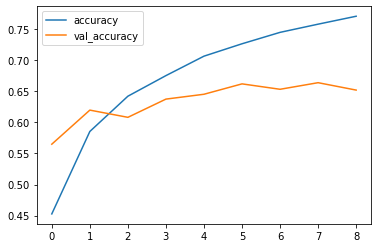

In [110]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

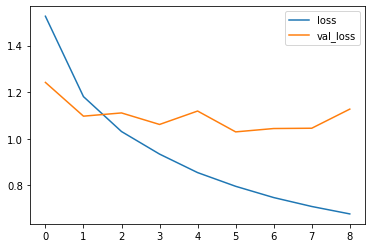

In [111]:
losses[['loss','val_loss']].plot()

In [112]:
model.metrics_names

['loss', 'accuracy']

In [115]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1273596286773682, 0.6518999934196472]


In [116]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=model.predict_classes(x_test)

In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.79      0.80      0.79      1000
           2       0.40      0.77      0.53      1000
           3       0.48      0.48      0.48      1000
           4       0.65      0.55      0.60      1000
           5       0.64      0.43      0.52      1000
           6       0.82      0.65      0.73      1000
           7       0.76      0.67      0.71      1000
           8       0.85      0.68      0.75      1000
           9       0.72      0.76      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.66     10000
weighted avg       0.68      0.65      0.66     10000



In [118]:
confusion_matrix(y_test,predictions)

array([[736,  22, 112,  17,  17,   3,   4,  10,  33,  46],
       [ 20, 795,  28,  11,   8,   4,  10,   6,  24,  94],
       [ 51,   5, 769,  48,  31,  29,  26,  23,   7,  11],
       [ 19,  15, 200, 477,  54, 116,  41,  40,  10,  28],
       [ 33,   5, 220,  65, 549,  29,  27,  57,   8,   7],
       [ 17,   4, 207, 202,  42, 435,  18,  55,   4,  16],
       [  5,  12, 151,  95,  36,  21, 654,   8,   5,  13],
       [ 17,   5, 119,  42,  89,  30,   7, 668,   3,  20],
       [127,  40,  62,  23,   3,   6,   2,   3, 677,  57],
       [ 33,  99,  36,  17,  10,  10,   5,   7,  24, 759]], dtype=int64)

<AxesSubplot:>

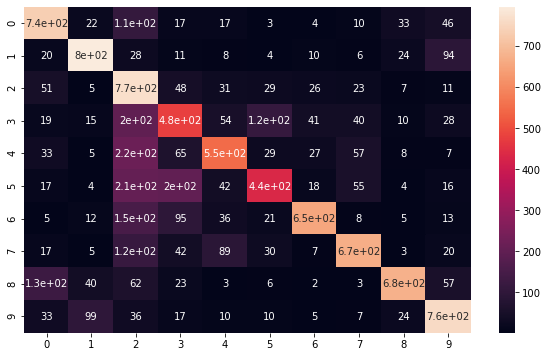

In [119]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [120]:
my_image=x_test[16]

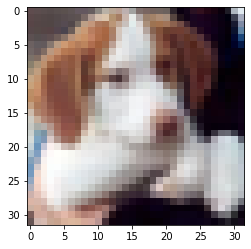

In [121]:
plt.imshow(my_image)

In [122]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)